In [15]:
import unittest
import os
import io
from inverter_simulator.simulator import InverterSimulator
from aemo_to_tariff import spot_to_tariff
import json
from zoneinfo import ZoneInfo
import requests
import pandas as pd
from datetime import datetime, timedelta

In [ ]:

API_KEY = os.getenv('POWSTON_API_KEY')

powston_test_server = os.getenv("POWSTON_TEST_SERVER", 'https://dev.inverterintelligence.com')
header = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}
site_id = 47

response = requests.get(f'{powston_test_server}/api/meter_data/{site_id}?from_date=2024-11-24&to_date=2024-11-28', headers=header).json()

meter_data_df = pd.read_json(response, orient="records", convert_dates=['interval_time'])
meter_data_df['interval_time'] = pd.to_datetime(meter_data_df['interval_time']).dt.tz_convert(ZoneInfo("Australia/Brisbane"))
meter_data_df.set_index('interval_time', inplace=True)
meter_data_df.sort_index(inplace=True)
# remove duplcates and keep the last value
meter_data_df = meter_data_df[~meter_data_df.index.duplicated(keep='last')]
meter_data_df.to_csv('/tmp/2024-11-07-meter_data.csv')

/tmp/ipykernel_3132987/69614328.py:16: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  meter_data_df = pd.read_json(response, orient="records", convert_dates=['interval_time'])


,energy_import,energy_export,battery_w,rrp,hhf_rrp,forecasts,solar_power,house_power,billed_costs,billed_earnings,buy_price,sell_price
interval_time,,,,,,,,,,,,
2024-11-23 23:00:00+10:00,0.001,0.001,0.00,167.77,167.77,"[147.82, 159.41, 165.57, 160.83, 151.77, 127.5...",0,0,0.556930,0.017598,20.656140,16.777
2024-11-23 23:05:00+10:00,0.268,0.259,0.00,167.61,167.61,"[147.82, 159.41, 165.57, 160.83, 151.77, 127.5...",0,0,7.026840,4.553558,20.638670,16.761
2024-11-23 23:10:00+10:00,0.311,0.313,0.00,220.87,220.87,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,9.980011,7.251574,26.454235,22.087
2024-11-23 23:15:00+10:00,0.145,0.157,0.00,202.36,202.36,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,4.627700,3.332541,24.433091,20.236
2024-11-23 23:20:00+10:00,0.001,0.001,0.00,165.16,165.16,"[163.81, 148.0, 165.33, 161.99, 150.55, 125.9,...",0,0,0.556629,0.017324,20.371149,16.516
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27 22:35:00+10:00,0.000,0.000,0.86,241.79,241.79,"[201.87, 188.76, 169.16, 134.77, 161.07, 175.3...",0,0,0.532680,0.000000,28.738531,24.179
2024-11-27 22:40:00+10:00,0.000,0.001,9.96,187.08,187.08,"[198.3, 170.8, 168.91, 141.69, 164.37, 176.86,...",0,0,0.532680,0.019624,22.764638,18.708
2024-11-27 22:45:00+10:00,0.001,0.000,1.12,184.33,184.33,"[198.3, 170.8, 168.91, 141.69, 164.37, 176.86,...",0,0,0.558841,0.000000,22.464360,18.433


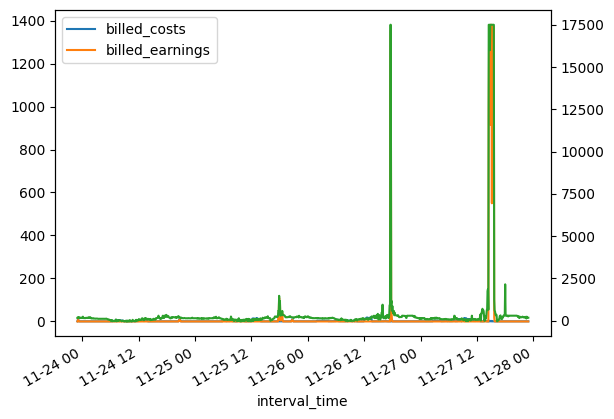

In [21]:
plt = meter_data_df[['billed_costs', 'billed_earnings']].plot()
meter_data_df['rrp'].plot(secondary_y=True, ax=plt)
meter_data_df

In [22]:
from matplotlib import pyplot as plt

def plot():
    ret_df['cost'] = ret_df['sim_cost']
    title = 'Simulation run'
    max_zoomed_rrp = 500

    if 'house_power' in ret_df.columns:
        ret_df['house_consumption'] = ret_df['house_power']
    if 'solar_power' in ret_df.columns:
        ret_df['ppv'] = ret_df['solar_power']
    if 'as_is_grid' not in ret_df.columns:
        if 'pgrid' in ret_df.columns:
            ret_df['as_is_grid'] = ret_df['pgrid']
        elif 'house_consumption' in ret_df.columns and 'ppv' in ret_df.columns:
            ret_df['as_is_grid'] = ret_df['house_consumption'] - ret_df['ppv']
        else:
            ret_df['as_is_grid'] = ret_df['Power from grid'] - ret_df['Power to grid']
    # Negative draws from the grid (so get absolute value)
    ret_df['as_is_general_power'] = abs(ret_df['as_is_grid'].clip(upper=0))
    if 'as_is_general_kwh' not in ret_df.columns:
        ret_df['as_is_general_kwh'] = ret_df['as_is_general_power'] / 1000.0 * 5 / 60
    # Positive draws from the grid
    ret_df['as_is_feed_in_power'] = ret_df['as_is_grid'].clip(lower=0)
    if 'as_is_feed_in_kwh' not in ret_df.columns:
        ret_df['as_is_feed_in_kwh'] = ret_df['as_is_feed_in_power'] / 1000.0 * 5 / 60

    nb_bill = 0
    retail_bill = ret_df['cost'].sum() / 100
    # five plots one ontop of the other, the first one twice as high as the others
    fig, ax = plt.subplots(5, 1, figsize=(20, 15), sharex=True)
    ax[0].grid()
    # First show costs
    start_date, end_date = ret_df.index[0], ret_df.index[-1]
    ax[0].set_title(f'{title}: {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')

    algo_label = 'Algo cost (Wholesale + Battery Management) $%.2f' % retail_bill
    ax[0].plot(ret_df['cost'].cumsum(), label=algo_label, color='orange')
    if 'billed_costs' in ret_df.columns and 'billed_earnings' in ret_df.columns:
        ret_df['retail_cost'] = (ret_df['billed_costs'] - ret_df['billed_earnings'])
        retail_label = 'Reported Bill'
        ax[0].plot(ret_df['retail_cost'].cumsum(), label='%s $%.2f' % (retail_label, ret_df['retail_cost'].sum() / 100), color='red')
        ax[0].legend()
    ax[0].xaxis.set_visible(False)
    ax[0].legend()
    # Set height of ax[0] to twice the height of ax[1]
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height * 1.5])

    # show as bar chart Power to grid	Power from grid
    ax[1].grid()
    ax[1].set_title('Power to and from grid')
    ax[1].plot(ret_df.index, ret_df['Power from grid'], label='Power from grid (W)')
    ax[1].plot(ret_df.index, -ret_df['Power to grid'], label='Power to grid (W)')

    if 'general_kwh' in ret_df.columns and 'feed_in_kwh' in ret_df.columns:
        kwh_to_w = 1000 * 60 / interval
        ax[1].plot(ret_df.index, ret_df['general_kwh'] * kwh_to_w, label='Metered general (W)')
        ax[1].plot(ret_df.index, -ret_df['feed_in_kwh'] * kwh_to_w, label='Metered feed (W)')

    ax[1].legend()
    ax[1].xaxis.set_visible(False)
    # now SOC and actions
    ax[2].xaxis.set_visible(False)
    ax[2].grid()
    if 'battery_charge' in ret_df.columns:
        ax[2].set_title('Battery charge')
        ax[2].plot(ret_df['battery_charge'], label='Battery charge (Wh)', color='green')
        ax[2].legend()
    elif 'battery_soc' in ret_df.columns:
        ax[2].set_title('Battery SOC')
        ax[2].plot(ret_df['battery_soc'], label='Battery SOC (%)', color='green')
        ax[2].legend()
    if 'battery_actual' in ret_df.columns:
        ax[2].plot(ret_df['battery_actual'], label='Battery actual (Wh)', color='blue')
        ax[2].legend()
    if 'action' in ret_df.columns:
        ax[2].set_title('Battery charge with actions')
        ret_df['change_action'] = ret_df['action'].shift(1) != ret_df['action']
        for row in ret_df[ret_df['change_action']].iterrows():
            if row[1]['action'] == 'export':
                color = 'red'
            elif row[1]['action'] == 'import':
                color = 'green'
            elif row[1]['action'] == 'charge':
                color = 'blue'
            elif row[1]['action'] == 'auto':
                color = 'grey'
            elif row[1]['action'] == 'discharge':
                color = 'purple'
            else:
                color = 'black'
            ax[2].text(row[0], row[1]['battery_charge'], f"{row[1]['action'][0]}", color=color)
    ax[3].set_title('House consumption vs Solar Generation')
    ax[3].plot(ret_df['house_consumption'], label='House consumption (W)', color='blue')
    ax[3].plot(ret_df['ppv'], color='orange', label="Solar output (W)")
    ax[3].legend()
    ax[3].grid()
    ax[3].xaxis.set_visible(False)

    # then subplot show rrp but only scale to 300
    if ret_df['rrp'].max() > 1000:
        ax[4].set_ylim(-10, max_zoomed_rrp)
    ax[4].grid()
    ax[4].set_title('Wholesale market price')
    ax[4].plot(ret_df['rrp']/10, label='Spot price c/kWh', color='darkgreen')
    if 'general_tariff' in ret_df.columns:
        ax[4].plot(ret_df['general_tariff'], label='General price c/kWh', color='darkblue')
    ax[4].legend()


User code -298.24 v auto only -45.49


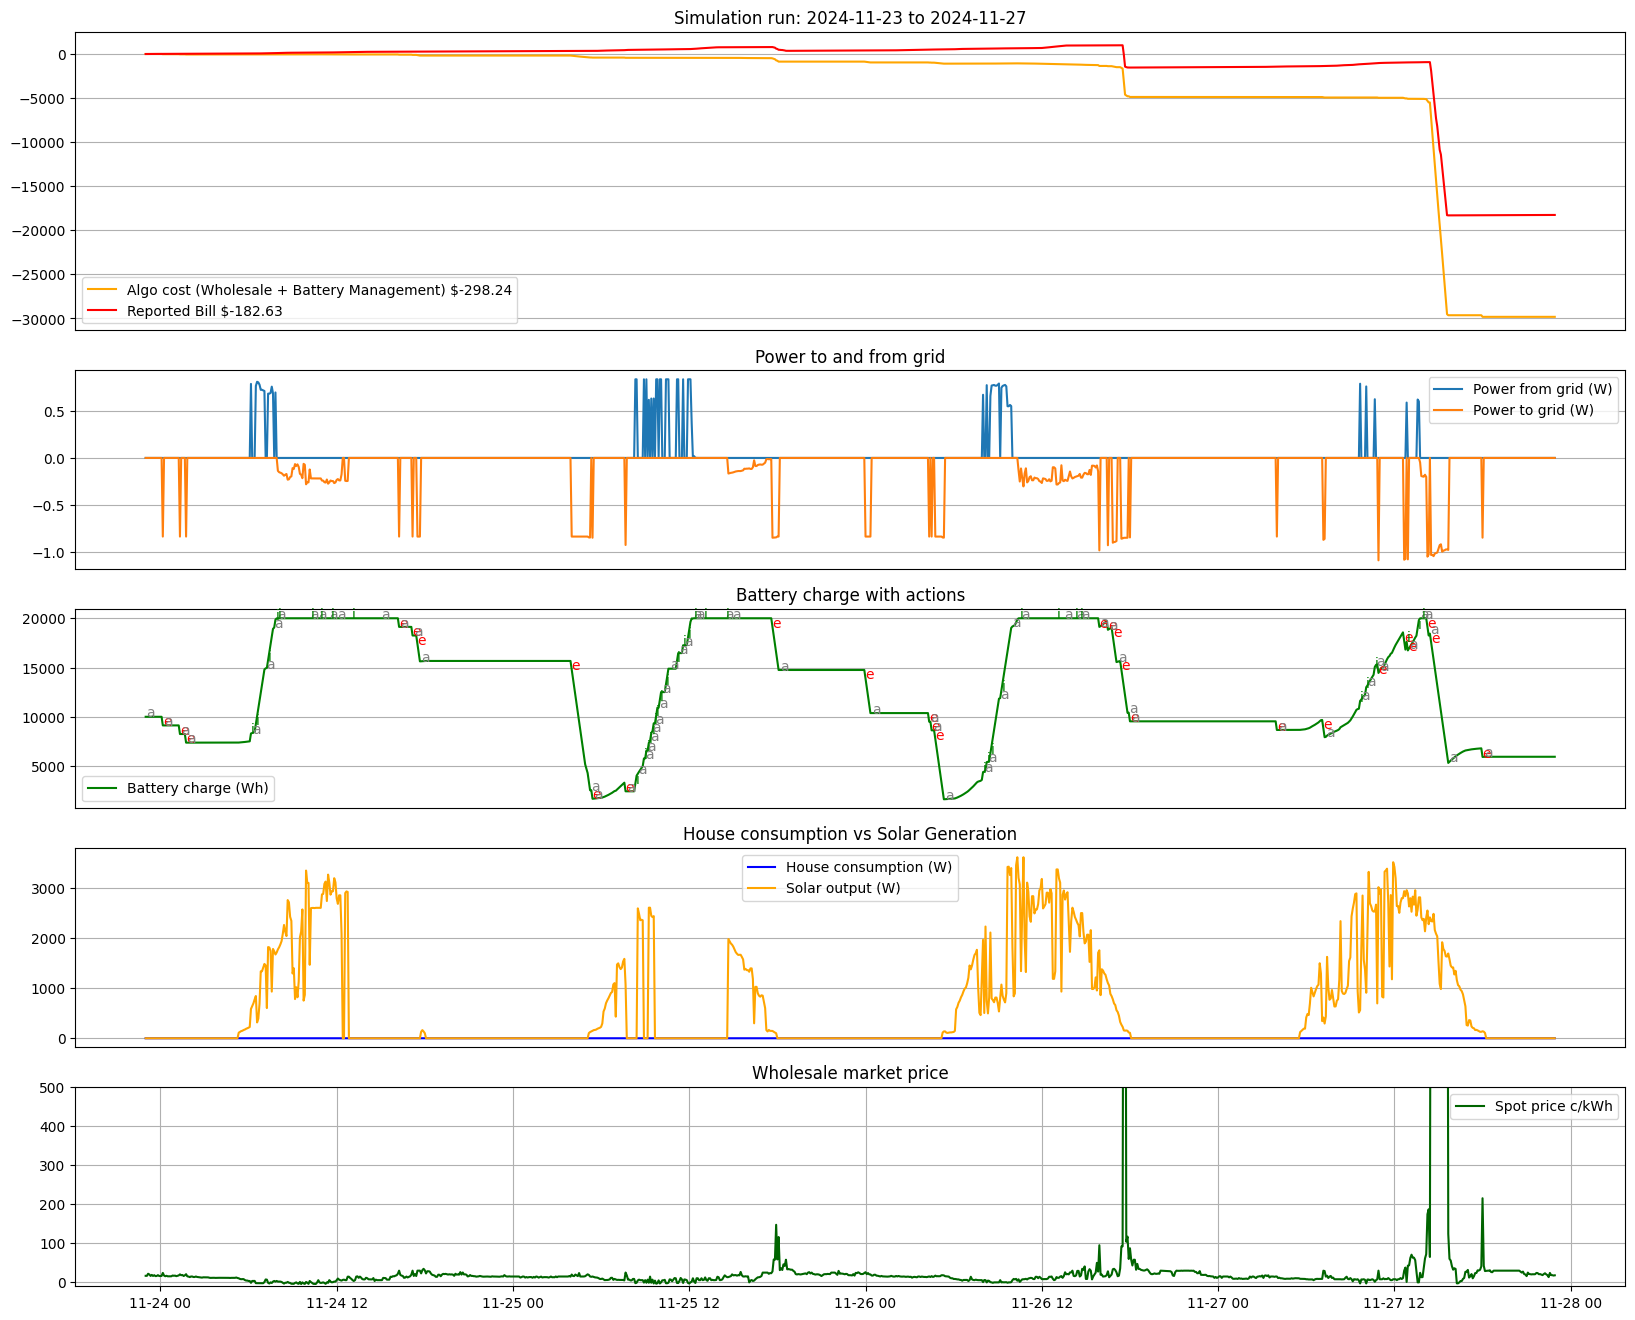

In [45]:
from astral import LocationInfo
from astral.sun import sun

filename = "script.py"
try:
    with open(filename, "r") as file:
        content = file.read()
except FileNotFoundError:
    print(f"R001 File {filename} not found")

def always_auto(inverval_time, **kwargs):
    return 'auto', 'always_auto'
    
battery_capacity = 20000
charge_rate = 10000
max_ppv_power = 0
meter_data_df['forecast'] = meter_data_df['forecasts']
sim = InverterSimulator(meter_data_df.copy(), always_auto, battery_capacity=battery_capacity,
                        charge_rate=charge_rate, max_ppv_power=max_ppv_power)
auto_bill, ret_df = sim.run_simulation()

def run_user_code(interval_time, **kwargs):
    params = {'interval_time': interval_time,
              'battery_capacity': battery_capacity,
              'charge_rate': charge_rate,
              'max_ppv_power': max_ppv_power,
              'action': 'auto',
              'reason': 'default: auto',
              'location': LocationInfo("Brisbane", "Australia", "Australia/Sydney", -27.4698, 153.0251)}
    for key, val in kwargs.items():
        params[key] = val
    with open(filename, "r") as file:
        content = file.read()
        code = compile(content, filename, 'exec')
        eval(code, globals(), params)
    return params['action'], params['reason']

sim = InverterSimulator(meter_data_df.copy(), run_user_code, battery_capacity=battery_capacity,
                        spot_to_tariff=spot_to_tariff, tariff='EA116', network='ausgrid',
                        charge_rate=charge_rate, max_ppv_power=max_ppv_power)
sim_bill, ret_df = sim.run_simulation()

print('User code', round(sim_bill/100, 2), 'v auto only', round(auto_bill/100, 2))
plot()